In [1]:
from os import path
import glob
import warnings

import astropy.coordinates as coord
from astropy.table import Table, hstack, join
import astropy.units as u
from astropy.io import ascii
from astropy.io import fits
import reproject

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
from scipy.spatial import cKDTree

from pyia import GaiaData
import gala.coordinates as gc
from dustmaps.sfd import SFDQuery
from astroquery.gaia import Gaia

from sfd import reddening

/Users/adrian/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
t = Table.read('../data/DECam-first-pass.fits')

In [21]:
c = coord.SkyCoord(ra=t['RA']*u.deg, dec=t['DEC']*u.deg)
c1 = coord.SkyCoord(ra=179*u.deg, dec=-29.5*u.deg)
c2 = coord.SkyCoord(ra=180*u.deg, dec=-28*u.deg)

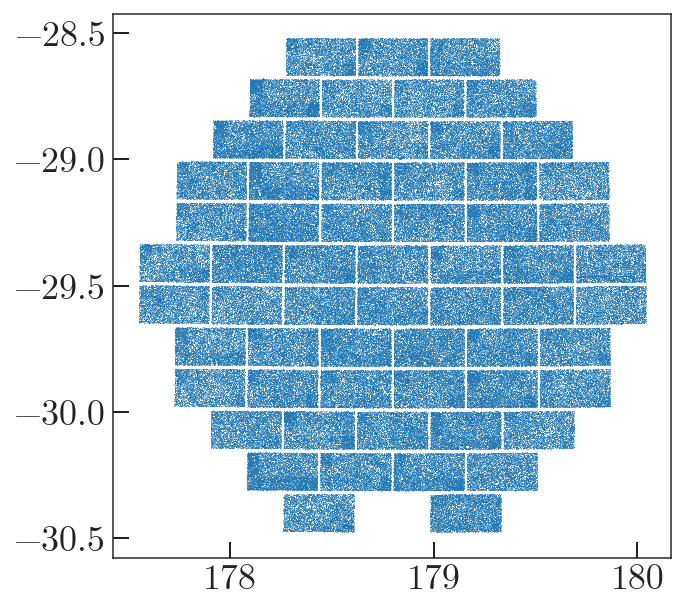

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(c.ra.degree, c.dec.degree, marker=',', 
        linestyle='none', alpha=0.5)

In [38]:
ugi = np.vstack((t['UMAG'], t['GMAG'], t['IMAG'])).T
mask = np.all(ugi < 26, axis=1)
mask &= c.separation(c1) < 0.5*u.deg
# mask &= c.separation(c2) < 0.2*u.deg # doh, misses this one
mask.sum()

11241

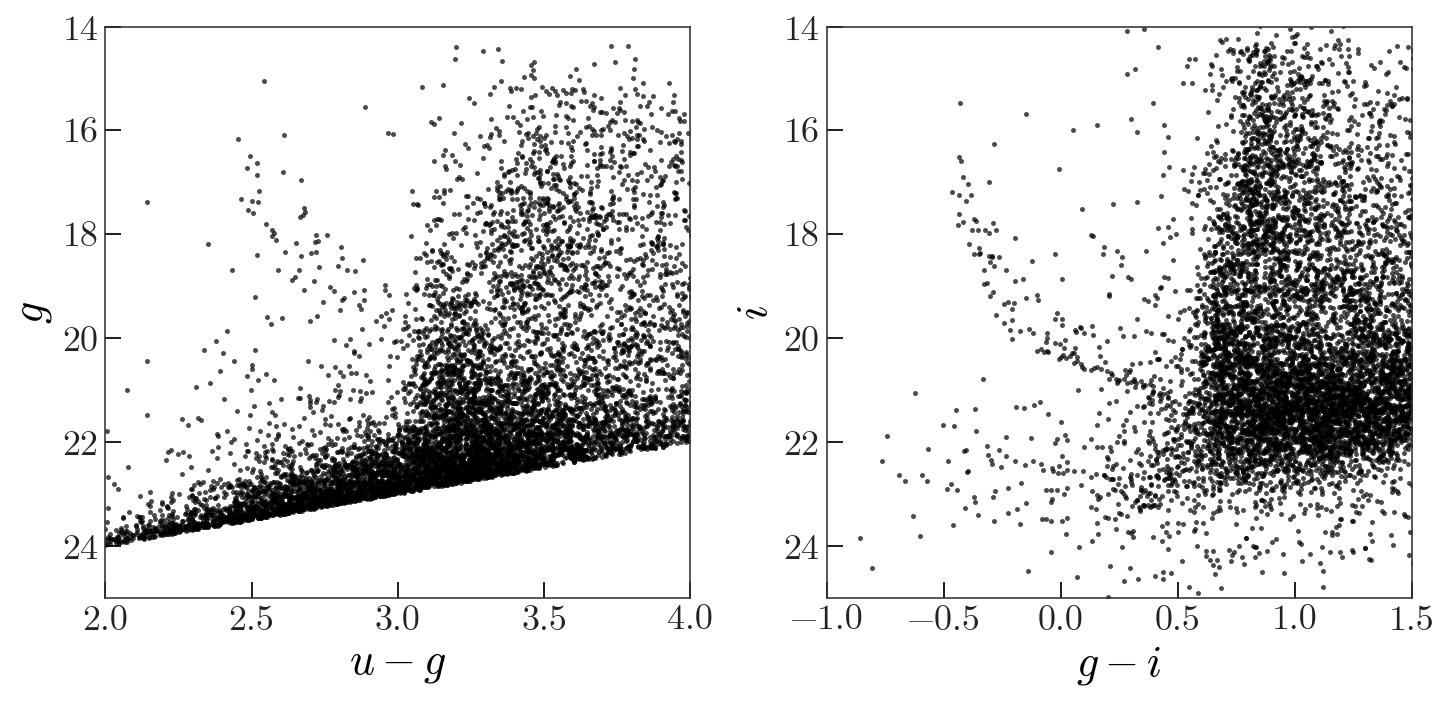

In [39]:
style = dict(marker='.', linestyle='none', 
             alpha=0.7, color='k')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]
ax.plot(ugi[mask, 0]-ugi[mask, 1], ugi[mask, 1], **style)
ax.set_ylim(25., 14)
ax.set_xlim(2, 4)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$g$')

ax = axes[1]
ax.plot(ugi[mask, 1]-ugi[mask, 2], ugi[mask, 2], **style)
ax.set_ylim(25., 14)
ax.set_xlim(-1, 1.5)
ax.set_xlabel('$g-i$')
ax.set_ylabel('$i$')

fig.tight_layout()

fig.savefig('../plots/deccam_ugi.png', dpi=200)